# Part I - Communicate Data Findings

## by EMMANUEL NCUBE


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangle">Preliminary Wrangling</a></li>
<li><a href="#Univariate">Univariate Exploration</a></li>
<li><a href="#Bivariate">Bivariate Exploration</a></li>
<li><a href="#Multivariate">Multivariate Exploration</a></li>
<li><a href="#Conclusion">Conclusion</a></li>
</ul>

<a id='intro'></a>
## Introduction

[Prosper](https://twitter.com/dog_rates) is America's first peer-to-peer lending marketplace, with over US7billion in funded loans. Borrowers request personal loans on Prosper and investors (individual or institutional) can fund anywhere from USD2000 to USD40,000 per loan request. Investors can consider borrowers’ credit scores, ratings, and histories and the category of the loan. Prosper handles the servicing of the loan and collects and distributes borrower payments and interest back to the loan investors. More information about Prosper can be found [here](https://en.wikipedia.org/wiki/Prosper_Marketplace). 

Our objective is to explore a dataset containing prosper loans and attributes for approximately 113,937 loans made to its clients. 

In [50]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

<a id='wrangle'></a>

## Preliminary Wrangling

#### Let's Load in our dataset and describe its properties.

In [51]:
# load in the dataset into a pandas dataframe
loans = pd.read_csv('prosperLoanData.csv')

In [52]:
# snapshot of data
loans.head(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [53]:
# data shape
loans.shape

(113937, 81)

In [54]:
# brief info
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [55]:
# Count of number of distinct elements.
loans.nunique()

ListingKey                             113066
ListingNumber                          113066
ListingCreationDate                    113064
CreditGrade                                 8
Term                                        3
LoanStatus                                 12
ClosedDate                               2802
BorrowerAPR                              6677
BorrowerRate                             2294
LenderYield                              2283
EstimatedEffectiveYield                  1582
EstimatedLoss                             120
EstimatedReturn                          1476
ProsperRating (numeric)                     7
ProsperRating (Alpha)                       7
ProsperScore                               11
ListingCategory (numeric)                  21
BorrowerState                              51
Occupation                                 67
EmploymentStatus                            8
EmploymentStatusDuration                  605
IsBorrowerHomeowner               

In [56]:
#  brief description
loans.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

There is existence of outliers in many variables. 

#### There are so many columns, l will pick a few l will work with

In [57]:
interested_cols = ['LoanOriginationDate', 'LoanStatus', 'DebtToIncomeRatio', 'EstimatedLoss',
                   'ProsperScore', 'ProsperRating (Alpha)','CreditScoreRangeLower', 'EmploymentStatus',
                   'IsBorrowerHomeowner', 'StatedMonthlyIncome', 'LoanOriginalAmount']

In [58]:
loans = loans[interested_cols]
loans.sample(5)

,LoanOriginationDate,LoanStatus,DebtToIncomeRatio,EstimatedLoss,ProsperScore,ProsperRating (Alpha),CreditScoreRangeLower,EmploymentStatus,IsBorrowerHomeowner,StatedMonthlyIncome,LoanOriginalAmount
83263,2013-08-05 00:00:00,Current,0.11,0.0749,5.0,C,700.0,Employed,False,4583.333333,6900
34727,2014-02-06 00:00:00,Current,0.20,0.0349,5.0,A,700.0,Employed,True,3666.666667,10000
89842,2013-11-13 00:00:00,Current,0.12,0.0549,7.0,B,660.0,Employed,False,7916.666667,5000
41893,2010-12-10 00:00:00,Completed,0.22,0.1080,8.0,D,700.0,Employed,False,4166.666667,7500
101286,2012-04-24 00:00:00,Completed,0.17,0.0565,8.0,B,660.0,Employed,False,6250.000000,7000


In [59]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 11 columns):
LoanOriginationDate      113937 non-null object
LoanStatus               113937 non-null object
DebtToIncomeRatio        105383 non-null float64
EstimatedLoss            84853 non-null float64
ProsperScore             84853 non-null float64
ProsperRating (Alpha)    84853 non-null object
CreditScoreRangeLower    113346 non-null float64
EmploymentStatus         111682 non-null object
IsBorrowerHomeowner      113937 non-null bool
StatedMonthlyIncome      113937 non-null float64
LoanOriginalAmount       113937 non-null int64
dtypes: bool(1), float64(5), int64(1), object(4)
memory usage: 8.8+ MB


There are incorrect datatypes in LoanOriginationDate, and other object type features need to be categorical.

In [60]:
# checking for duplicates
loans.duplicated().sum()

2

In [61]:
# dropping duplicates and checking again
loans = loans.drop_duplicates()
# anymore duplicates
loans.duplicated().sum()

0

In [62]:
# take only ProsperRating (Alpha) after July 2009
loans = loans[loans['ProsperRating (Alpha)'].notnull()]

In [63]:
# l will rename some columns
loans.rename(columns={'ProsperRating (Alpha)':'ProsperRatingAlpha',
                      'CreditScoreRangeLower':'CreditScore'}, inplace=True)

In [64]:
# convert LoanOriginationDate to date
loans['LoanOriginationDate'] = pd.to_datetime(loans['LoanOriginationDate'])
# round StatedMonthlyIncome to 2dp
loans['StatedMonthlyIncome'] = round(loans['StatedMonthlyIncome'], 2)

In [65]:
# drop null rows
loans['DebtToIncomeRatio'].fillna(0, inplace=True)

In [66]:
# convert Prosper Rating and Employment Status into ordered categorical types
rating = loans['ProsperRatingAlpha'].value_counts().index
rating_cat = pd.api.types.CategoricalDtype(ordered = True, categories = rating)
loans['ProsperRatingAlpha'] = loans['ProsperRatingAlpha'].astype(rating_cat)

employ_status = loans['EmploymentStatus'].value_counts().index
employment_cat = pd.api.types.CategoricalDtype(ordered = True, categories = employ_status)
loans['EmploymentStatus'] = loans['EmploymentStatus'].astype(employment_cat)

In [67]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84852 entries, 1 to 113936
Data columns (total 11 columns):
LoanOriginationDate    84852 non-null datetime64[ns]
LoanStatus             84852 non-null object
DebtToIncomeRatio      84852 non-null float64
EstimatedLoss          84852 non-null float64
ProsperScore           84852 non-null float64
ProsperRatingAlpha     84852 non-null category
CreditScore            84852 non-null float64
EmploymentStatus       84852 non-null category
IsBorrowerHomeowner    84852 non-null bool
StatedMonthlyIncome    84852 non-null float64
LoanOriginalAmount     84852 non-null int64
dtypes: bool(1), category(2), datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 6.1+ MB


In [68]:
print(f'The prosper loan dataset now contains {loans.shape[0]} rows and {loans.shape[1]} columns.')

The prosper loan dataset now contains 84852 rows and 11 columns.


### What is the structure of your dataset?

> The data contain 113937 rows and 81 columns about Prosper loans. I will focus on a cleaned data of 84852 rows and 11 columns.

### What is/are the main feature(s) of interest in your dataset?

> l am interested in features that determine prosper's credit rating (alpha) in the Prosper loans dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>  l also think that borrower's estimated loss is a major determinants of Prosper's credit rating. l also expect other features such as Prosper Score, Credit Score, Debt to Income (DTI), employment status and stated monthly income will have effects on prosper rating.

<a id='Univariate'></a>
## Univariate Exploration

> In this section, I will investigate distributions of individual variables.l will clean things up
and prepare myself to look at relationships between variables.

#### Distribution of Prosper Rating

#### Let's plot all ordinal and nominal variable's distribution in a single plot.


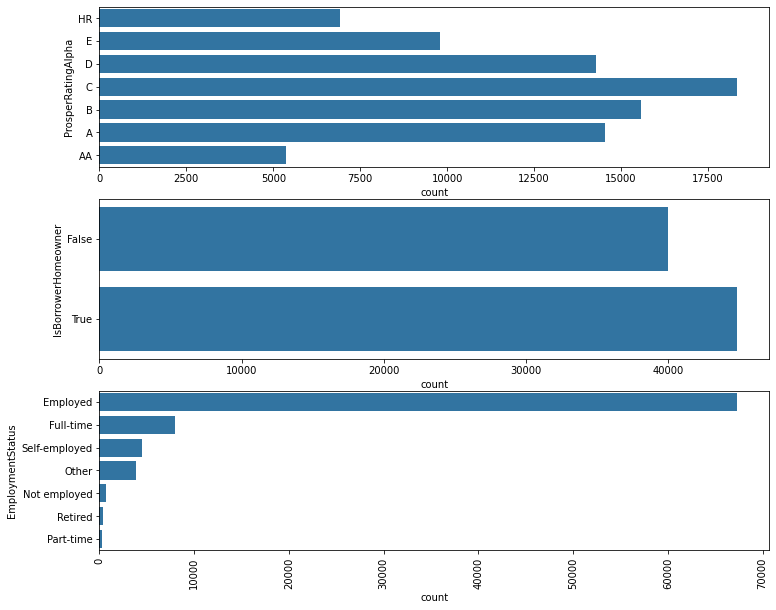

In [69]:
fig, ax = plt.subplots(nrows=3, figsize = [12, 10])
order = ['HR', 'E', 'D', 'C', 'B','A', 'AA']
base_color = sb.color_palette()[0]

sb.countplot(data = loans, y = 'ProsperRatingAlpha', color = base_color, order=order, ax = ax[0])
sb.countplot(data = loans, y = 'IsBorrowerHomeowner', color = base_color, ax = ax[1])
sb.countplot(data = loans, y = 'EmploymentStatus', color = base_color, ax = ax[2])
plt.xticks(rotation=90)
plt.show();

Prosper Ratings, from lowest-risk to highest-risk, are labeled AA, A, B, C, D, E, and HR ("High Risk"). Most prosper clients' prosper ratings are C followed by B, A, D, E and HR. Most borrowers are home owners and the majority of them are employed and full time.

#### Distribution of Debt To Income Ratio

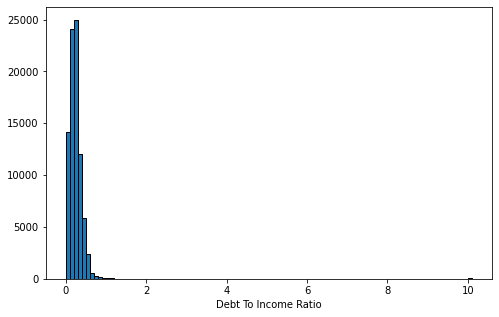

In [70]:
# plotting a hist
plt.figure(figsize=(8, 5))
binsize = 0.10
bin_edges = np.arange(loans['DebtToIncomeRatio'].min(), loans['DebtToIncomeRatio'].max() + binsize, binsize)
n, bins, patches = plt.hist(loans['DebtToIncomeRatio'], bins=bin_edges, edgecolor='black')
plt.xlabel('Debt To Income Ratio')
plt.show();

Debt to income ratio contains outliers and is skewed to the right.

##### l will remove the outliers

In [71]:
loans = loans.query('DebtToIncomeRatio > 0')

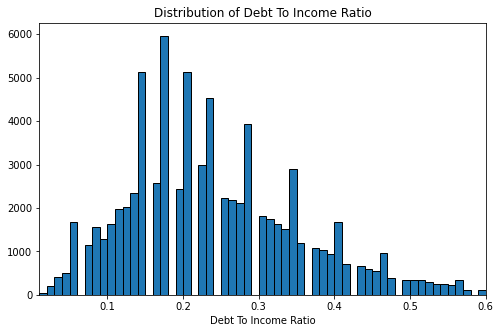

In [72]:
plt.figure(figsize=(8, 5))
binsize = 0.01
bin_edges = np.arange(loans['DebtToIncomeRatio'].min(), loans['DebtToIncomeRatio'].max() + binsize, binsize)
n, bins, patches = plt.hist(loans['DebtToIncomeRatio'], bins=bin_edges, edgecolor='black')
plt.xlabel('Debt To Income Ratio')
plt.xlim(0.01, 0.60)
plt.title('Distribution of Debt To Income Ratio')
plt.show();

In [73]:
mode_index = n.argmax()
# the most frequent bin
print('The most frequent bin: (' + str(bins[mode_index]) + ',' + str(bins[mode_index+1]) + ')')
# the mode         
print('The mode: '+ str((bins[mode_index] + bins[mode_index+1])/2))

The most frequent bin: (0.17,0.18000000000000002)
The mode: 0.17500000000000002


Most borrowers had not borrowed before shown by DTI of zero or null. After transformation, DTI ratio looks bimodal, with a lot of peaks and deeps throughout and still right skewed. The most frequent DTI ratio: (0.17,0.18). The mode: 0.175

#### Distribution of Credit Score

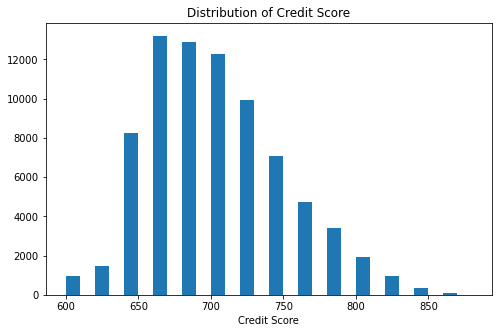

In [74]:
plt.figure(figsize=(8, 5))
binsize = 10
bin_edges = np.arange(loans['CreditScore'].min(), loans['CreditScore'].max() + binsize, binsize)
n1, bins1, patches1 = plt.hist(loans['CreditScore'], bins=bin_edges)
plt.xlabel('Credit Score')
plt.title('Distribution of Credit Score')
plt.show();

In [75]:
mode_index = n1.argmax()
# the most frequent bin
print('The most frequent bin: (' + str(bins1[mode_index]) + ',' + str(bins1[mode_index+1]) + ')')
# the mode         
print('The mode: '+ str((bins1[mode_index] + bins1[mode_index+1])/2))

The most frequent bin: (660.0,670.0)
The mode: 665.0


The Credit Score looks normally distributed.
The most frequent Credit Score range: (660.0 , 670.0)
The modal Credit Score: 665.0

#### Distribution of Estimated Loss

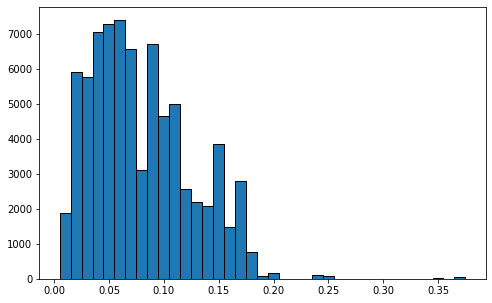

In [76]:
plt.figure(figsize=(8, 5))
binsize = 0.01
bin_edges = np.arange(loans['EstimatedLoss'].min(), loans['EstimatedLoss'].max() + binsize, binsize)
plt.hist(loans['EstimatedLoss'], bins=bin_edges, edgecolor='black')
plt.show();

#### There is existence of outliers, will remove them.

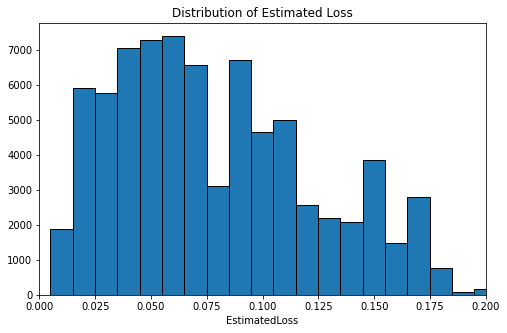

In [77]:
plt.figure(figsize=(8, 5))
binsize = 0.01
bin_edges = np.arange(loans['EstimatedLoss'].min(), loans['EstimatedLoss'].max() + binsize, binsize)
n2, bins2, patches2 = plt.hist(loans['EstimatedLoss'], bins=bin_edges, edgecolor='black')
plt.xlim([0, 0.20])
plt.xlabel('EstimatedLoss')
plt.title('Distribution of Estimated Loss')
plt.show();

In [78]:
mode_index = n2.argmax()
# the most frequent bin
print('The most frequent bin: (' + str(bins2[mode_index]) + ',' + str(bins2[mode_index+1]) + ')')
# the mode         
print('The mode: '+ str((bins2[mode_index] + bins2[mode_index+1])/2))

The most frequent bin: (0.054900000000000004,0.0649)
The mode: 0.0599


Estimated Loss has a lot of outliers. After transformation using axes limits and different binsizes, the Estimated Loss looks bimodal with peaks at firstly soon after 0.075, secondly at slightly after 0.10 and around 0.15. The most frequent estimated loss range: (0.25, 0.11).The most frequent estimated loss range: (0.05,0.07). The mode estimated loss: 0.1099.

#### Distribution of Prosper Score

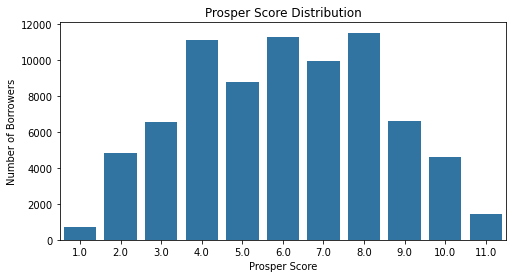

In [79]:
fig = plt.figure(figsize=(8,4))
sb.countplot(data=loans, x='ProsperScore', color=base_color)
plt.title('Prosper Score Distribution')
plt.xlabel('Prosper Score')
plt.ylabel('Number of Borrowers')
plt.show()

The Prosper Score is bimodal and ranges from 1 - 11. Most Prosper Scores ranges between 5 and 9. The Prosper Score of 8 was the most commonly occuring in the Prosper loans dataset.

#### Distribution of Stated Monthly Income

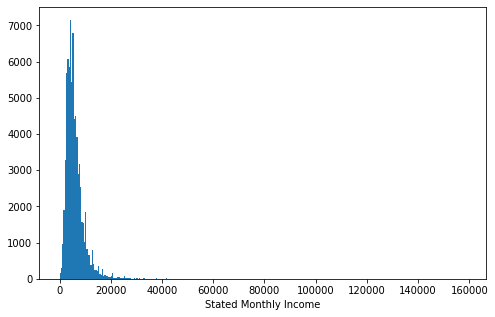

In [80]:
plt.figure(figsize=(8, 5))
binsize=500
bins = np.arange(0, loans['StatedMonthlyIncome'].max()+binsize, binsize )
plt.hist(data=loans, x = 'StatedMonthlyIncome', bins=bins)
plt.xlabel('Stated Monthly Income');

#### To get a clearest view of the data, let's experiment with different axis limits as well as bin widths.

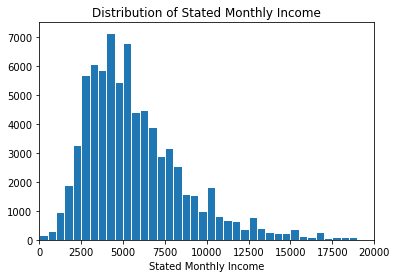

In [81]:
binsize=500
bins = np.arange(0, loans['StatedMonthlyIncome'].max()+binsize, binsize )
plt.hist(data=loans, x = 'StatedMonthlyIncome', bins=bins, edgecolor='white')
plt.xlabel('Stated Monthly Income')
plt.xlim((0, 20000))
plt.title('Distribution of Stated Monthly Income')
plt.show();

Stated Monthly income contains a lot of outliers and is skewed to be right. Due to very large range of values taken, let's transform it in a log scale.

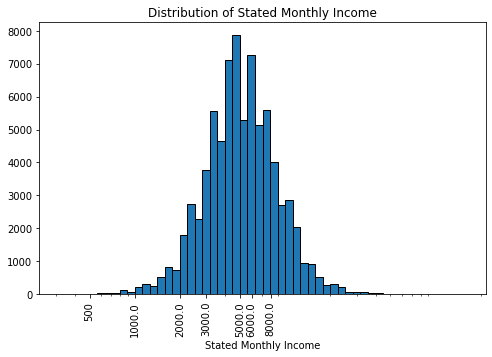

In [82]:
# there's a long tail in the distribution, so let's put it on a log scale instead
plt.figure(figsize=(8, 5))
log_binsize=0.05
bins = 10 ** np.arange(2.5, np.log10(loans['StatedMonthlyIncome'].max())+log_binsize, log_binsize )
ticks = [500, 1e3, 2e3, 3e3, 5e3, 6e3, 8e3]
labels = ['{}'.format(val) for val in ticks]
n3, bins3, patches3 = plt.hist(data=loans, x = 'StatedMonthlyIncome', bins=bins, edgecolor='black')
plt.xscale(('log'))
plt.xticks(ticks, labels)
plt.xticks(rotation=90)
plt.xlabel('Stated Monthly Income')
plt.title('Distribution of Stated Monthly Income')
plt.show();

In [83]:
mode_index = n3.argmax()
# the most frequent bin
print('The most frequent bin: (' + str(bins3[mode_index]) + ',' + str(bins3[mode_index+1]) + ')')
# the mode         
print('The mode: '+ str((bins3[mode_index] + bins3[mode_index+1])/2))

The most frequent bin: (4466.835921509589,5011.872336272673)
The mode: 4739.354128891131


Monthly Stated Income has a long-tailed distribution, with a lot of borrowers on the low monthly income  end, and few on the high monthly income end. When plotted on a log-scale, the stated monthly income looks roughly bimodal, with one peak between 2000 and 3000, and a second peak a little below 5000. Interestingly, there's a steep jump in frequency right before 6000, rather than a smooth steep up. Most borrowers have monthly income of between 4000 - 8000.

#### Distribution of loan original amount

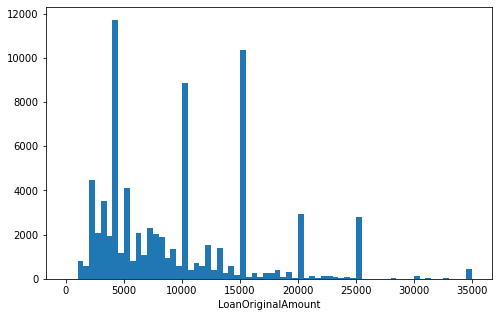

In [84]:
plt.figure(figsize=(8, 5))
binsize=500
bins = np.arange(0, loans['LoanOriginalAmount'].max()+binsize, binsize )
n3, bins3, pacthes3 = plt.hist(data=loans, x = 'LoanOriginalAmount', bins=bins)
plt.xlabel('LoanOriginalAmount');

#### Loan Original Amount contains a lot of outliers and is skewed to be right. Due to the very large range of values taken, let's transform using xlim.

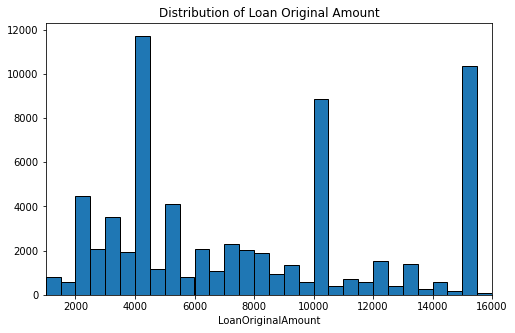

In [85]:
plt.figure(figsize=(8, 5))
binsize=500
bins = np.arange(1000, loans['LoanOriginalAmount'].max()+binsize, binsize )
n3, bins3, pacthes3 = plt.hist(data=loans, x = 'LoanOriginalAmount', bins=bins, edgecolor='black')
plt.xlabel('LoanOriginalAmount')
plt.title('Distribution of Loan Original Amount')
plt.xlim((1000, 16000));

In [86]:
mode_index = n3.argmax()
# the most frequent bin
print('The most frequent bin: (' + str(bins3[mode_index]) + ',' + str(bins3[mode_index+1]) + ')')
# the mode         
print('The mode: '+ str((bins3[mode_index] + bins3[mode_index+1])/2))

The most frequent bin: (4000,4500)
The mode: 4250.0


The original loan amounts looks multimodal, with noticeable peaks at slightly after 2000, after 4000 and before 16000, with loans greater than 25000 being extremely rarely given. The most frequent bin: (4000,4500). The mode: 4250.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Prosper Ratings range from lowest-risk to highest-risk and are labeled AA, A, B, C, D, E, and HR ("High Risk"). Most prosper clients' prosper ratings are C followed by B, A, D, E and HR.The prosper ratings Credit Scores were normally distributed. Most borrowers are employed fulltime and the majority of people have a stated monthly income of between 4000 and 5500. The original loan amounts looks multimodal, with noticeable peaks at slightly after 2000, after 4000 and before 16000, with loans greater than 25000 being extremely rarely given.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When investigating the Prosper Score, Credit Score, DTI ration, Loan amount, estimated loss variables, a number of outlier points were identified. For safety, all of these points were removed from the dataset to move forward with plottings.

<a id='Bivariate'></a>
## Bivariate Exploration

> In this section, we will investigate relationships between pairs of variables in prosper loans
data.

#### Prosper Rating and Estimated Loss

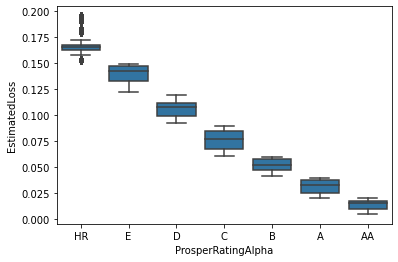

In [87]:
# limit estimated loss to 0.2
estimatedloss_df = loans.query('EstimatedLoss <= 0.2')
sb.boxplot(data=estimatedloss_df, y = 'EstimatedLoss',  x ='ProsperRatingAlpha', order=order, color=base_color);

#### Loan status and Prosper rating

#### l will start by plotting correlation plot for numerical variables.

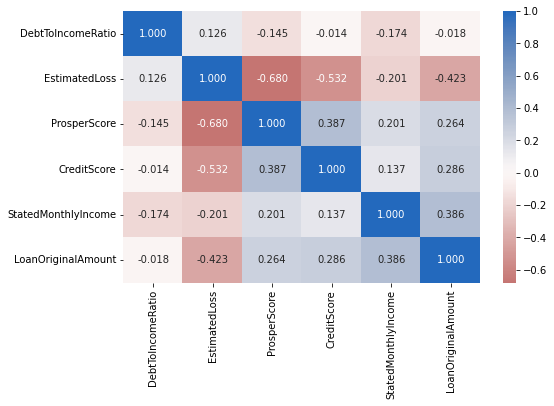

In [88]:
numeric_cols = loans.describe().columns.tolist()
plt.figure(figsize = [8, 5])
sb.heatmap(loans[numeric_cols].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

#### l will sample 500 clients so that plots are clearer and they render faster

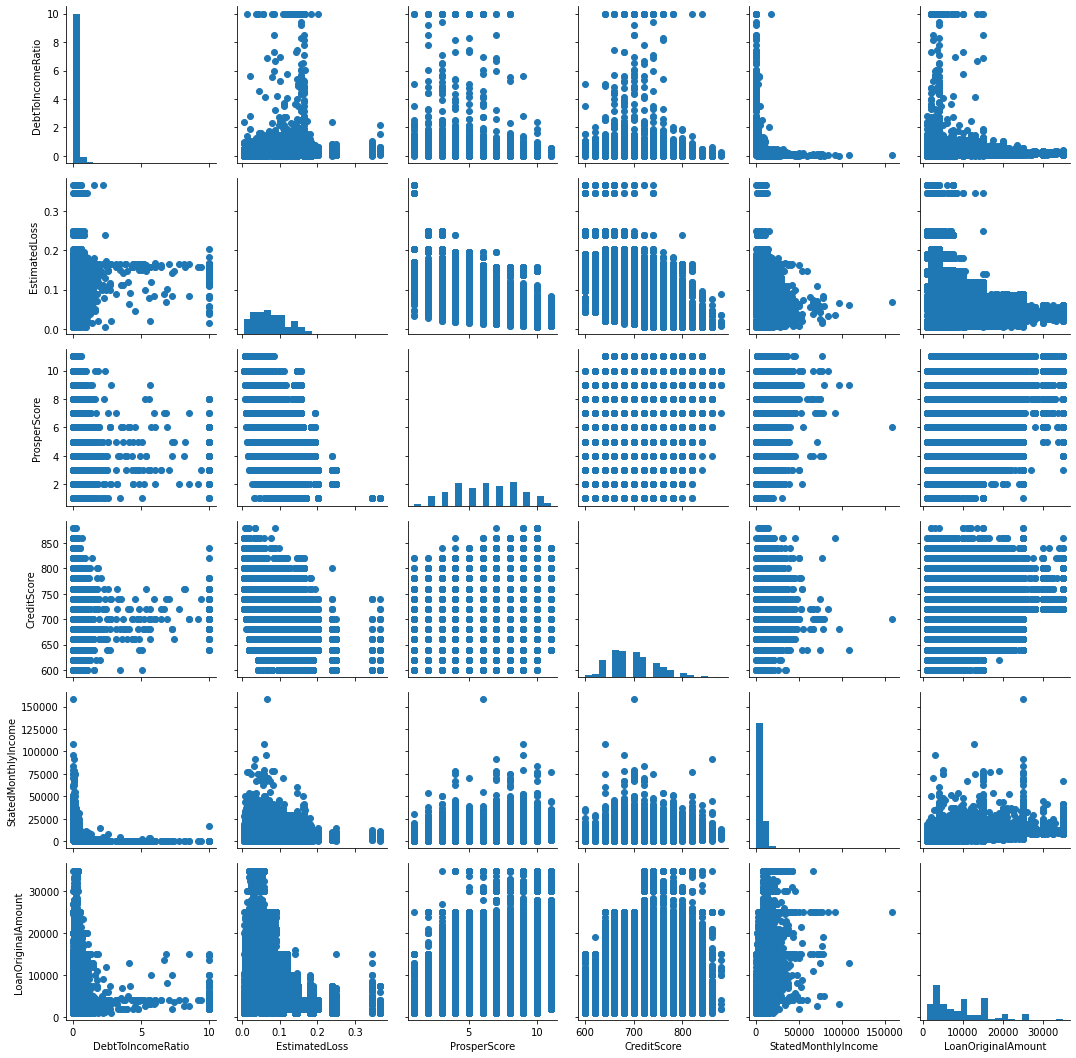

In [89]:
# plot matrix
df_samp = loans.sample(500)
g = sb.PairGrid(data = loans, vars = numeric_cols)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

Prosper Score and Credit Score are positively and moderately correlated with each other and are both highly and negatively correlated with Estimated Loss. Interestingly both Prosper Score and Credit Score are positively correlated with the Loan original amount. Also Loan original amount is negatively correlated with estimated loss. Loan original amount is moderately correlated with Stated Monthly income. People with higher DTI are riskier that those with low DT1 and the former tend to be associated with low credit and prosper scores and ultimately high estimated loss.

#### Let's look at subplots of more relationships

<AxesSubplot:xlabel='ProsperRatingAlpha', ylabel='count'>

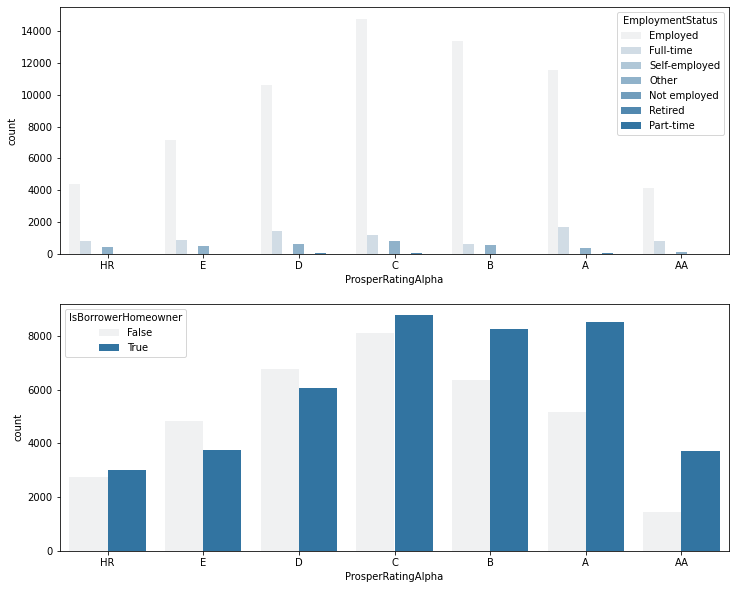

In [90]:
fig, axes = plt.subplots(nrows=2, figsize=(12, 10))
sb.countplot(data=loans, x = 'ProsperRatingAlpha', hue ='EmploymentStatus', order=order, color=base_color, ax=axes[0])
sb.countplot(data=loans, x = 'ProsperRatingAlpha', hue ='IsBorrowerHomeowner', order=order, color=base_color, ax=axes[1])

Interestings, unemployed people are assigned low/riskier Prosper Rating(Alpha), lower credit and prosper scores and higher estimated loss. However, it is clear that home owners tend to be associated with higher Prosper ratings and that high Estimated loss is associated with low Prosper Rating. 

#### l will plot matrix of numeric features against categorical features.

<Figure size 1080x720 with 0 Axes>

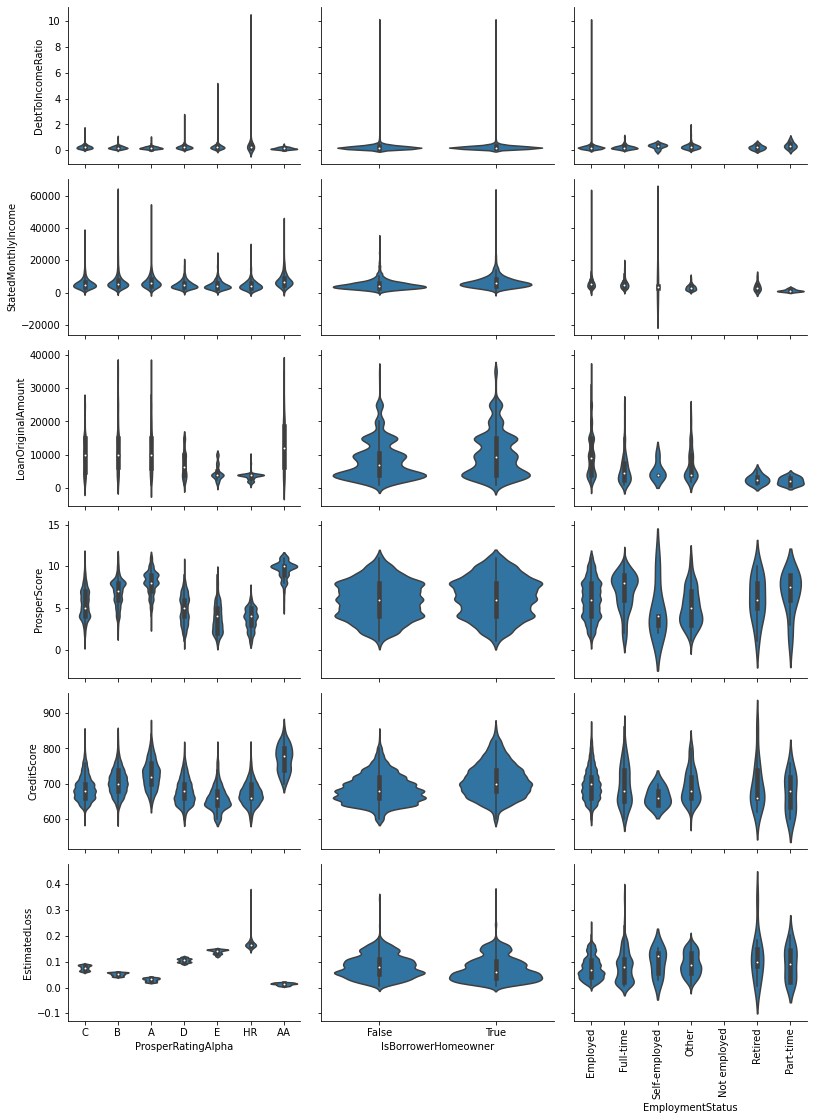

In [91]:
loans_samp = loans.sample(5000)
plt.figure(figsize=(15, 10))
categoric_cols = ['ProsperRatingAlpha', 'IsBorrowerHomeowner', 'EmploymentStatus']
base_color = sb.color_palette()[0]
g = sb.PairGrid(data = loans_samp, x_vars = categoric_cols, 
                y_vars = ['DebtToIncomeRatio','StatedMonthlyIncome','LoanOriginalAmount','ProsperScore', 'CreditScore', 'EstimatedLoss'], 
                aspect = 1.5)
g.map_offdiag(sb.violinplot, color=base_color)
plt.xticks(rotation=90);

Observed once again, employed people are of low risk (prosper rating), higher credit and prosper scores and lower estimated loss.It is also seen that part-time employed people have low credit and prosper scores but with high Estimated Losses than the full-time employed. Also higher risk loans are associated with low Credit and Prosper Scores and lower borrowers Stated monthly income and low original loan amounts. It is also noticeable that people who own homes have high Credit and Prosper Score, low estimated loss, and are labelled less risky in terms of prosper rating(alpha). People who own homes have higher stated monthly incomeand are granted higher loan amounts.  Once again people with higher DTI are risky than those with low DTI and have low credit and prosper scores but positively correlate with higher estimated loss.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> As expected Prosper score and credit score both highly correlate with estimated loss which in turn correlates with the Prosper Rating.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I observed that employed people, lower DTI, home ownership, higher stated monthly income variables are associated with high prosper and credit scores as well being less risky(low rated).

<a id='Multivariate'></a>
## Multivariate Exploration

> l will create plots of three or more variables to investigate the data even further.

#### Home Ownership vs Prosper Score by Prosper Rating (Alpha)

<Figure size 576x432 with 0 Axes>

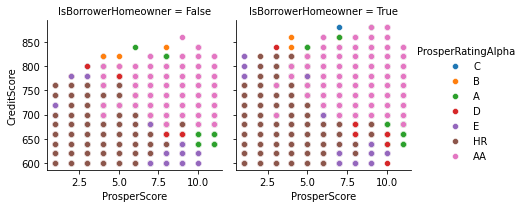

In [98]:
plt.figure(figsize=(8, 6))
g = sb.FacetGrid(loans, col="IsBorrowerHomeowner", hue="ProsperRatingAlpha")
g.map(sb.scatterplot, "ProsperScore", "CreditScore")
g.add_legend();

Less risky loans are associated with home owners, higher prosper and credit scores.

#### Let's plot a matrix of numeric variables by Prosper Rating (Alpha)

<Figure size 1440x1080 with 0 Axes>

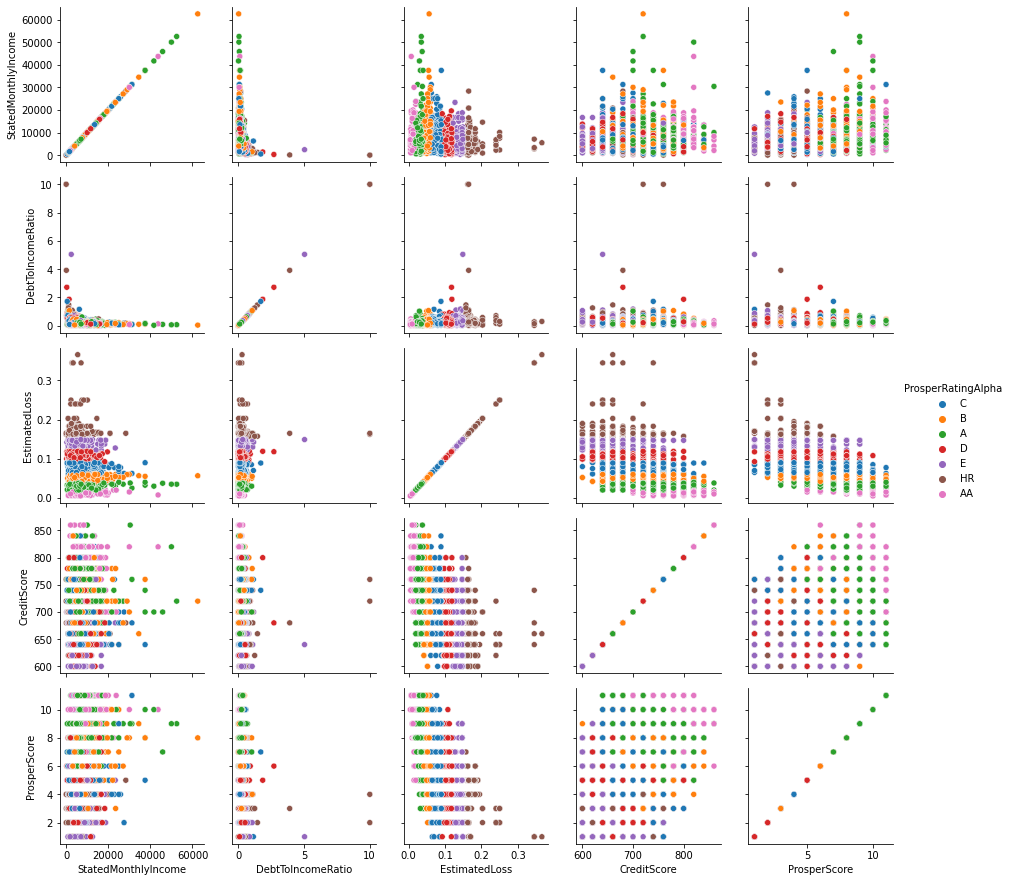

In [96]:
plt.figure(figsize=(20, 15))
g = sb.PairGrid(loans_samp, vars=["StatedMonthlyIncome","DebtToIncomeRatio", "EstimatedLoss", 'CreditScore', 'ProsperScore'], hue="ProsperRatingAlpha")
g.map(sb.scatterplot)
g.add_legend();

#### Estimated Loss vs Credit Score by Prosper Rating Alpha

In [ ]:
order = loans['ProsperRatingAlpha'].unique().tolist()
plt.figure(figsize = [8, 4])
g = sb.FacetGrid(data=loans, hue='ProsperRatingAlpha', hue_order=order, aspect = 1.5)
g.map(sb.regplot, 'CreditScore', 'ProsperScore', x_jitter=0.04, fit_reg=False)
g.add_legend()
plt.title('Prosper Score vs Credit Score by Prosper Rating Alpha');

Low risk loans have higher credit and prosper score. And the higher the credit and prosper score, the lower the estimated loss. Therefored risky loans have high estimated loans.

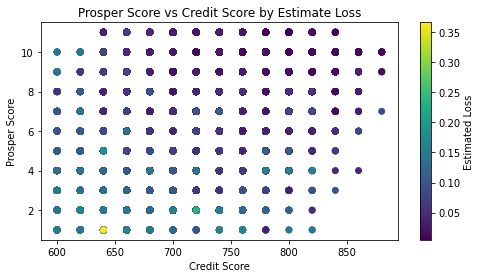

In [99]:
plt.figure(figsize = [8,4])
plt.scatter(data=loans, x = 'CreditScore', y = 'ProsperScore', c='EstimatedLoss')
plt.colorbar(label = 'Estimated Loss')
plt.xlabel('Credit Score')
plt.ylabel('Prosper Score')
plt.title('Prosper Score vs Credit Score by Estimate Loss');

Higher Credit Score and Prosper scores tend to go with lower estimated losses.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The multivariate exploration here showed that there indeed is a positive and strong effect of increased prosper score and credit score and lower estimated loss on prosper rating (alpha). The effect of the home ownership on prosper rating was also clearly seen. 

### Were there any interesting or surprising interactions between features?

> Low risk loans have higher credit and prosper score. And the higher the credit and prosper score, the lower the estimated loss. Therefore risky loans have high estimated loans. The effect of employment status on prosper rating is not clear though.

<a id='Conclusion'></a>
## Conclusion

> Generally, the higher the credit and prosper scores, the lower the estimated loss. Therefore risky loans have higher estimated loans. Estimated Loss has a major effect on prosper rating (alpha) and estimated loss is determined by prosper score, credit score, home ownership and DTI.